## First Analysis

### Importing all needed packages

In [15]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
from tqdm import tqdm 

### Mechanism to hidden some words from analysis.

In [ ]:
# SHOW_USELESS_WORDS = True
SHOW_USELESS_WORDS = False

In [ ]:
uselessWords = {
    'o', 'a', 'os', 'as', 
    'um', 'uma', 'uns', 'umas', 
    'e',
    'de', 'do', 'da',
    'sobre',
    'ma',
    'lo', 'la'
    'que',
    'se',
    'em',
    'com',
    'é',
    'que'
}
# uselessWords

### Loading into a dataframe the content of the dataset (CSV file)

In [ ]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

In [ ]:
len(rawDf)

### Some manipulation to the strings.

- lower case
- replace some symbols

In [ ]:
df = rawDf['review_text'].str.lower()
df.head()

In [ ]:
df[1]

In [ ]:
def cleanWord( word ):
    
    word = word.replace(',', '')
    word = word.replace('.', '')
    word = word.replace('❤', '')
    word = word.replace('💜', '')

    return word

### Creating a list with all unique words to use further.

In [ ]:
# For time counting
startTime = time.time()

allWords = list()
words = list()

for review in df:
    
#     print(review)
    rawWords = str(review).split()
    
    for word in rawWords:
        word = cleanWord( word )
        
        if word not in words:
            words.append( word )

if not SHOW_USELESS_WORDS:
    
    for word in words:
        if word in uselessWords:
            continue
        else:
            allWords.append( word )
        
else: 
    allWords = words
    
# allWords

# For time counting
endTime = time.time()
elapsedTime = endTime - startTime
print( f'Running Time: {elapsedTime / 60} minutes' )

### Total of unique words.

In [ ]:
print( 'List size: {}'.format( len(allWords) ) )

### Build a word cloud with all unique words.

In [ ]:
allJoinedWords = " ".join( allWords ) + " "

if SHOW_USELESS_WORDS:

    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        min_font_size = 10
    ).generate( allJoinedWords )
    
else:
    
    wordcloud = WordCloud(
        width = 800, 
        height = 800,
        background_color ='white',
        stopwords = uselessWords,
        min_font_size = 12
    ).generate( allJoinedWords )

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### Seeing the words and each total in a table way.

In [ ]:
allWordsDict = {}
for review in df:
    
    # print(review)
    
    words = str(review).split()
    # print(words)
    
    for word in words:
        
        if (not SHOW_USELESS_WORDS) and (word in uselessWords):
            continue
        
        word = cleanWord( word )
        
        if word not in allWordsDict.keys():
            
            allWordsDict[word] = 1
            
        else:
            
            allWordsDict[word] += 1

# print( allWordsDict )

In [ ]:
allWordsDF = pd.DataFrame()

allWordsDF[ 'word' ] = allWordsDict.keys()
allWordsDF[ 'count' ] = allWordsDict.values()

allWordsDF.head(10)

In [ ]:
allWordsDF.sort_values(
    by = 'count',
    ascending = 0)

## Second Analysis

#### Using Spacy and K-Means to analyze the tokens and try to group the contained sentences in each review.

#### Good tutorials and other texts

- Tutorial: Text Classification in Python Using spaCy
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

### Importing all needed packages

#### Command to install **spaCy** package: ***pip install spacy***

In [113]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import spacy
from tqdm import tqdm 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

### Installing and loading the Portuguese pipeline.
#### To install Portuguese pipeline by command line, type: *python -m spacy download pt_core_news_lg*
#### See more on: https://spacy.io/models/pt#pt_core_news_lg


In [67]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [68]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [69]:
df = rawDf
df.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


### Some values in the *review_text* column are *nan* so I changed the values to an empty string to avoid breaking the program when reading each item to extract the sentences.

One example:

|book_id|review_id|review_rating|review_title|review_text|
|:------|:------:|:------:|:------|:------:|
|8547000240|R1QX38W7D6QOQ4|5<!-- .element: style="text-align:center;" -->|livro maravilhoso, ainda estou acabando de ler mais posso afirma que e espetacular.|nan|

In [70]:
rawDf = pd.read_csv( 
    './datasets/treated_csv_file.csv',
    encoding = 'UTF8',
    sep = ';');
rawDf.head()

,book_id,review_id,review_rating,review_title,review_text
0,8595081530,RM0NBXMBSU4M3,4,Um dos melhores livros sobre introdução ao con...,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,R3KC0ZLPQX85LT,5,Livro excelente,Ensinamentos que eu tive quando li o livro:1. ...
2,8595081530,R2UADYH9X17S5V,4,Enriquecedor,"Sucinto livro de parábolas, O homem mais rico ..."
3,8595081530,RGJ6BAA0J8P77,5,Ótima leitura de fácil compreensão e ensinamen...,De forma clara traz ensinamentos sobre educaçã...
4,8595081530,RZ65FZEPU1Y8V,1,O livro O homem mais rico da Babilônia está fa...,O livro O homem mais rico da Babilônia está fa...


In [71]:
df = rawDf
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72777 entries, 0 to 72776
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   book_id        72777 non-null  int64 
 1   review_id      72777 non-null  object
 2   review_rating  72777 non-null  object
 3   review_title   72700 non-null  object
 4   review_text    72774 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [72]:
df['review_text'] = df['review_text'].fillna('')

In [73]:
df['review_text'].isnull().values.any()

False

In [74]:
reviewPosition = 1

In [75]:
df.iloc[reviewPosition]

book_id                                                 8595081530
review_id                                           R3KC0ZLPQX85LT
review_rating                                                    5
review_title                                       Livro excelente
review_text      Ensinamentos que eu tive quando li o livro:1. ...
Name: 1, dtype: object

In [76]:
doc = nlp( u''.join(df.iloc[reviewPosition]['review_text']) )
doc

Ensinamentos que eu tive quando li o livro:1. Primeiro pague a si mesmo e depois aos outros.“Uma parte de todos os seus ganhos pertencem exclusivamente a você.”Quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar. No livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma. As outras 9 moedas você pode gastar. Mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter. Gastar com necessidades, e não com desejos.Precisamos gastar menos do que ganhamos.2. Controle os seus gastos. Muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro. Por isso, precisamos saber exatamente no que gastamos. É necessário examinar cuidadosamente seu habitual modo de viver, para isso, é fundamental anotar as suas despesas, fazer um orçamento para saber o que é essencial é o que pode ser cortado.3. Multiplique o seu dinheiro.Depois que você conseguir

In [77]:
totalTokensToPrint = 30

print( f'Printing the first {totalTokensToPrint}th tokens:\n' )

for token in doc[0:totalTokensToPrint]:
    print( f'{token.text:{15}} {spacy.explain(token.pos_):{30}} {token.lemma_:{15}}' )

Printing the first 30th tokens:

Ensinamentos    noun                           Ensinamentos   
que             pronoun                        que            
eu              pronoun                        eu             
tive            verb                           ter            
quando          subordinating conjunction      quando         
li              verb                           ler            
o               determiner                     o              
livro:1         noun                           livro:1        
.               punctuation                    .              
Primeiro        adverb                         Primeiro       
pague           verb                           pagar          
a               adposition                     o              
si              pronoun                        si             
mesmo           adverb                         mesmo          
e               coordinating conjunction       e              
depois          adverb

In [78]:
for sentence in doc.sents:
    
    print( f'{sentence}' )
    print( f'--- Sentence size: {len(sentence)}' )
    print()

Ensinamentos que eu tive quando li o livro:1.
--- Sentence size: 9

Primeiro pague a si mesmo e depois aos outros.
--- Sentence size: 10

“Uma parte de todos os seus ganhos pertencem exclusivamente a você.
--- Sentence size: 12

”Quando trabalhamos e recebemos o dinheiro, é essencial que peguemos uma parte para guardar.
--- Sentence size: 16

No livro se fala que se você ganha 10 moedas, você precisa guardar pelo menos uma.
--- Sentence size: 18

As outras 9 moedas você pode gastar.
--- Sentence size: 8

Mas quando se diz em gastar, estão falando das coisas que realmente precisamos ter.
--- Sentence size: 16

Gastar com necessidades, e não com desejos.
--- Sentence size: 9

Precisamos gastar menos do que ganhamos.2.
--- Sentence size: 7

Controle os seus gastos.
--- Sentence size: 5

Muitas pessoas acham que o salário que ganham não é o suficiente para pagar as contas do mês, quem dirá conseguir guardar um dinheiro.
--- Sentence size: 26

Por isso, precisamos saber exatamente no que ga

### Building a dataframe of sentences and building a new dataset of sentences.

In [79]:
# # totalReviews = 10
# # totalReviews = 10000
# # i = 0

# # For time counting
# startTime = time.time()

# csvFile = './datasets/sentences.csv'
# csvDF = pd.DataFrame(columns = [
#     'book_id', 
#     'review_id', 
#     'review_rating', 
#     # 'review_title', 
#     'sentence'
# ]) 

# # for index in tqdm( range(0, totalReviews), desc="Progress", ncols=100 ):
# for index in tqdm( range(0, len(df)), desc="Progress", ncols=100 ):
    
#     review = df.iloc[index]
        
#     # print( f"- Book ID: {review['book_id']}" )
#     # print( f"- Review ID: {review['review_id']}" )
#     # print( f"- Review Rating: {review['review_rating']}" )
#     # print( f"- Review Title: {review['review_title']}" )
#     # print( f"- Review Text: {review['review_text']}" )
#     # print()
    
#     doc = nlp( u''.join( review['review_text'] ) )
#     # print(doc[0])
#     # print()
    
#     # print( '- Sentences' )
#     # print()
    
#     for sentence in doc.sents:
    
#         # print( f'{sentence}' )
#         # print( f'--- Sentence size: {len(sentence)}' )
#         # print()
        
#         row = {
#             'book_id': review['book_id'],
#             'review_id': review['review_id'],
#             'review_rating': review['review_rating'],
#             # 'review_title': review['review_title'],
#             'sentence': sentence
#         }
#         csvDF.loc[ len(csvDF), csvDF.columns ] = row
        
#         # print(i)
#         # print( f"review_id: {review['review_id']}" )
#         # print(sentence)
#         # print()
        
#         # i = i + 1
    
#     # print('\n======================================= Another Review =======================================\n\n')
    
# csvDF.to_csv(
#     csvFile, 
#     encoding = 'utf-8', 
#     index = False,
#     sep=';'
# )
# # print( csvDF )

# print('======================================================================')
# print('Finished')

# # For time counting
# endTime = time.time()
# elapsedTime = endTime - startTime
# print( f'Running Time: {elapsedTime / 60} minutes' )

### Loading the sentences of the CSV file.

In [80]:
nlp = spacy.load('pt_core_news_lg') # https://spacy.io/models/pt#pt_core_news_lg

In [81]:
df = pd.read_csv( 
    './datasets/sentences.csv',
    encoding = 'UTF8',
    sep = ';');
df.head()

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,Sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,Ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"Você NÃO vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,Basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,Mostra os detalhes de uma forma tão direta e b...


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176751 entries, 0 to 176750
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   book_id        176751 non-null  int64 
 1   review_id      176751 non-null  object
 2   review_rating  176751 non-null  int64 
 3   sentence       176750 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.4+ MB


In [83]:
df.iloc[0]['sentence']

'Sabe todos aqueles livros que ensinam você a criar uma agenda para controle de gastos contendo tudo que você gasta durante determinado período de tempo e que você nunca consegue terminar o tal método?'

In [84]:
doc = nlp( df.iloc[0]['sentence'] )
tokens = [token.text for token in doc]
print(tokens)

['Sabe', 'todos', 'aqueles', 'livros', 'que', 'ensinam', 'você', 'a', 'criar', 'uma', 'agenda', 'para', 'controle', 'de', 'gastos', 'contendo', 'tudo', 'que', 'você', 'gasta', 'durante', 'determinado', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'consegue', 'terminar', 'o', 'tal', 'método', '?']


In [85]:
tokens = [token.lemma_ for token in doc]
print(tokens)

['Sabe', 'todo', 'aquele', 'livro', 'que', 'ensinar', 'você', 'o', 'criar', 'umar', 'agendar', 'parir', 'controlo', 'de', 'gasto', 'conter', 'tudo', 'que', 'você', 'gasto', 'durante', 'determinar', 'período', 'de', 'tempo', 'e', 'que', 'você', 'nunca', 'conseguir', 'terminar', 'o', 'tal', 'método', '?']


### Analysis of top sentences

In [86]:
df['sentence'].value_counts()

                                                                                1116
Muito bom                                                                        584
Recomendo.                                                                       561
!                                                                                514
Muito bom!                                                                       459
                                                                                ... 
Muito bom, fácil a leitura e bem diferente dos filmes hehehehe                     1
O Senhor do anéis completo.                                                        1
Gostei tanto que comprei em seguida o box                                          1
História muito cativante e divertida de se ler.                                    1
A poesia de  Amanda  é visceral ,intensa e tão próxima de todas as mulheres.       1
Name: sentence, Length: 138605, dtype: int64

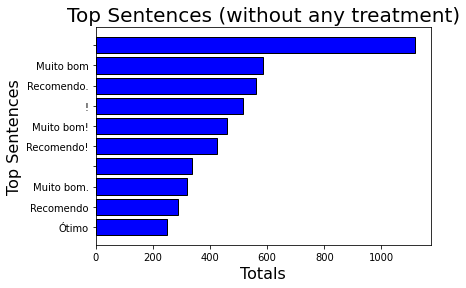

In [87]:
topSentencesLimit = 10
topSentences = df['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = df['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (without any treatment)', fontsize=20 )
plt.show()

In [88]:
# sentences = df['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1]
# cleanedSentences = [sentence.lower().strip( ' .!\'️\'' ) for sentence in sentences]
# cleanedSentences = [sentence for sentence in cleanedSentences if len(sentence) > 0 ]
# print( cleanedSentences )
# # print( len(cleanedSentences[3]) )
# # print( cleanedSentences[3] )
# # print( cleanedSentences[3].isspace() )
# # print( not cleanedSentences[3] )

In [89]:
sentences = df['sentence'].tolist()
# [print(sentence) for sentence in sentences]
cleanedSentences = [str(sentence).lower().strip( ' .!\'️\'' ) for sentence in sentences]
# cleanedSentences = [sentence for sentence in cleanedSentences if len(sentence) > 0 ]
dfTopSentences = df
dfTopSentences['sentence'] = cleanedSentences
dfTopSentences['sentence'].head()

0    sabe todos aqueles livros que ensinam você a c...
1    ou daqueles que você termina a leitura sentind...
2    você não vai encontrar um setup milagroso, ou ...
3    basicamente este livro conta verdades sobre o ...
4    mostra os detalhes de uma forma tão direta e b...
Name: sentence, dtype: object

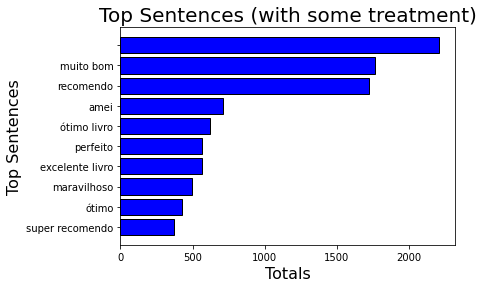

In [90]:
topSentencesLimit = 10
topSentences = dfTopSentences['sentence'].value_counts().index[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
pos = np.arange( topSentencesLimit )
sentenceTotals = dfTopSentences['sentence'].value_counts().values[ :topSentencesLimit ].tolist()[::-1] # [::-1] - Reverse the list
 
plt.barh(
    pos,
    sentenceTotals,
    color='blue',
    edgecolor='black')
plt.yticks( pos, topSentences )
plt.xlabel( 'Totals', fontsize=16 )
plt.ylabel( 'Top Sentences', fontsize=16 )
plt.title( 'Top Sentences (with some treatment)', fontsize=20 )
plt.show()

### A good question to future investigation:

**We can relate these top sentences with users? Maybe the top sentences belongs to the same group of people...**

**But we need to observe privacy before this...**

### Building a Bag of Words (BoW) with the words of the sentences.

In [120]:
lineTotal = 500

partialDf = df.iloc[ :lineTotal ]
partialDf.head()

,book_id,review_id,review_rating,sentence
0,8595081530,RM0NBXMBSU4M3,4,sabe todos aqueles livros que ensinam você a c...
1,8595081530,RM0NBXMBSU4M3,4,ou daqueles que você termina a leitura sentind...
2,8595081530,RM0NBXMBSU4M3,4,"você não vai encontrar um setup milagroso, ou ..."
3,8595081530,RM0NBXMBSU4M3,4,basicamente este livro conta verdades sobre o ...
4,8595081530,RM0NBXMBSU4M3,4,mostra os detalhes de uma forma tão direta e b...


In [121]:
partialDf.tail()

,book_id,review_id,review_rating,sentence
495,8595081530,R2VULRVN2LCNI4,5,- despreza a oportunidade quando ela aparece
496,8595081530,R2VULRVN2LCNI4,5,preferem esperar .as
497,8595081530,R2VULRVN2LCNI4,5,oportunidades não esperar por um procrastinador
498,8595081530,R2VULRVN2LCNI4,5,"ele sempre hesita,acha que deverá esperar uma ..."
499,8595081530,R2VULRVN2LCNI4,5,como poderá ser bem sucedido um homem assim ?


In [122]:
partialDf.shape

(500, 4)

#### Disable warnings

In [123]:
import warnings
warnings.filterwarnings("ignore")

In [124]:
# for i in range(0, len(partialDf)):
    
#     item = partialDf.iloc[i]
    
#     # print(item)
    
#     doc = nlp( item['sentence'] )
#     tokens = [ token.lemma_ for token in doc ]
    
#     for token in tokens:
        
#         if token not in partialDf.columns:
#             partialDf[ token ] = 0

#         partialDf.iloc[ i ][ token ] = 1
#         # print(partialDf.iloc[ i ][ token ])

# partialDf.head()

In [125]:
def tokenizer( sentence ):
    doc = nlp( sentence )
    tokens = [token.lemma_ for token in doc]
    
    return tokens

#### BoW - Sparse Matrix - Token Frequency

In [126]:
vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1))
# X = vectorizer.fit_transform( partialDf['sentence'] )
# print( vectorizer.get_feature_names_out() )
# print( X.toarray() )

dfBowTokenFrequency = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTokenFrequency

,,%,'',(,),",",-,.,...,.4-,...,ótima,ótimas,ótimo,último,único,útil,“,”,…,●
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### BoW - Sparse Matrix - Binary

In [127]:
vectorizer = CountVectorizer(
    tokenizer=tokenizer,
    ngram_range=(1,1),
    binary=True)
# X = vectorizer.fit_transform( partialDf['sentence'] )
# print( vectorizer.get_feature_names_out() )
# print( X.toarray() )

dfBowBinary = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowBinary

,,%,'',(,),",",-,.,...,.4-,...,ótima,ótimas,ótimo,último,único,útil,“,”,…,●
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
498,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### BoW - Sparse Matrix - TF-IDF

#### https://www.kaggle.com/code/k4puneet/countvectorizer-tfidf-tutorial/notebook

In [130]:
vectorizer = TfidfVectorizer( analyzer = tokenizer )

dfBowTFIDF = pd.DataFrame(
    data = vectorizer.fit_transform( partialDf['sentence'] ).toarray(),
    columns = vectorizer.get_feature_names())
dfBowTFIDF

,,%,'',(,),",",-,.,...,.4-,...,ótima,ótimas,ótimo,último,único,útil,“,”,…,●
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.073089,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.074942,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,0.0,0.000000,0.418157,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
498,0.0,0.0,0.0,0.0,0.0,0.209489,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
